# Nonstructural Seismic Fragility Tool 
Tool to estimate fragility paramater of nonstrcutural building components from experimental testing database. Fits fragilities using the maximum liklihood estimation, assuming a lognormal distribution. 

Prior to running script ensure that all required packages are installed by running the following commands on your command line
 - pip install numpy
 - pip install scipy
 - pip install pandas
 - pip install matplotlib
 - pip install ipywidgets

## Import packages

In [1]:
import numpy as np
import scipy as sp
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets

## Load testing database

In [2]:
df = pd.read_csv('db_experimental.csv')
print(df)

     Specimen ID  Reference id      Component Type  Damage State Intensity  \
0              1  KAT-2006-SEI  Drywall Partitions                 0.01500   
1              1  KAT-2006-SEI  Drywall Partitions                 0.02000   
2              1  KAT-2006-SEI  Drywall Partitions                 0.04000   
3              1  KAT-2006-SEI  Drywall Partitions                 0.10000   
4              2  KAT-2006-SEI  Drywall Partitions                 0.00500   
..           ...           ...                 ...                     ...   
271           72  RYA-2015-SEI     Fire Sprinklers                 0.66709   
272           72  RYA-2015-SEI     Fire Sprinklers                 0.85012   
273           72  RYA-2015-SEI     Fire Sprinklers                 0.89900   
274           72  RYA-2015-SEI     Fire Sprinklers                 1.12540   
275           72  RYA-2015-SEI     Fire Sprinklers                 1.21860   

    Damage State Unit  Damage State Rank  
0               Drif

## Characterize Data

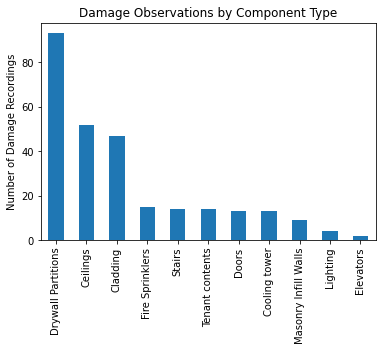

In [3]:
ax = df['Component Type'].value_counts(sort=True).plot.bar(rot=90, title='Damage Observations by Component Type')
ax.set_ylabel("Number of Damage Recordings");
comp_types = df['Component Type'].unique()
edp_types = df['Damage State Unit'].unique()

## Select Component Type and Fit Fragility
From the available component types listed above, select a type of component to develop a seismic fragility curve.

### Check if all damage records use the same demand parameter

In [4]:
def check_edp(comptype="Drywall Partitions"):
    newdf = df[(df['Component Type'] == comptype)]
    ax = newdf['Damage State Unit'].value_counts(sort=True).plot.bar(rot=90, title='Demand Parameters Observed')
    ax.set_ylabel("Number of Damage Recordings");

In [5]:
widgets.interact(check_edp, comptype = comp_types);

interactive(children=(Dropdown(description='comptype', options=('Drywall Partitions', 'Doors', 'Elevators', 'S…

### Plot Distribution of Damage Records

In [6]:
def check_intensity(comptype="Drywall Partitions",edp='Drift'):
    newdf = df[(df['Component Type'] == comptype) & (df['Damage State Unit'] == edp)]
    convert_data = newdf[['Damage State Intensity']].apply(pd.to_numeric)
    ax = convert_data.plot.hist(column=["Damage State Intensity"], title='Component Capacity')
    ax.set_xlabel(edp);

In [7]:
widgets.interact(check_intensity, comptype = comp_types, edp = edp_types);

interactive(children=(Dropdown(description='comptype', options=('Drywall Partitions', 'Doors', 'Elevators', 'S…

### Fit Seismic Fragility

In [8]:
def fit_frag(comptype="Drywall Partitions",edp='Drift'):
    newdf = df[(df['Component Type'] == comptype) & (df['Damage State Unit'] == edp)]
    if newdf.size > 0:
        convert_data = newdf[['Damage State Intensity']].apply(pd.to_numeric)

        # Rank the data
        ranked_data = convert_data.sort_values(by='Damage State Intensity')
        num_records = ranked_data.size
        ranked_data['rank'] = np.linspace(1, num_records, num=num_records)/num_records

        # Fit the fragility
        up_lim = ranked_data['Damage State Intensity'].max()
        x=np.linspace(0,up_lim,100)
        param = sp.stats.lognorm.fit(ranked_data['Damage State Intensity'])
        cdf_fitted = sp.stats.lognorm.cdf(x, param[0], loc=param[1], scale=param[2]) # fitted distribution

        # Plot the data
        ax = ranked_data.plot.scatter(x='Damage State Intensity', y='rank')
        plt.plot(x,cdf_fitted,'r-')
        ax.set_xlabel(edp);

        # Print the Fragility Parameters
        print('μ = ', round(param[2],3))
        print('β = ', round(param[0],2))
    else:
      print("No Damage Records")
    

In [9]:
widgets.interact(fit_frag, comptype = comp_types, edp = edp_types);

interactive(children=(Dropdown(description='comptype', options=('Drywall Partitions', 'Doors', 'Elevators', 'S…